# Delhi House Price

> # Read The Data, Acquire the main libraries 

___Get The Data___

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv("MagicBricks.csv")
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


# Cleaning Data

In [20]:
data.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [22]:
data.duplicated().sum()

83

In [54]:
data_null = data.isna().mean() * 100
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
Area,0.000000
BHK,0.000000
Bathroom,0.158856
Furnishing,0.397141
Locality,0.000000
Parking,2.621128
Price,0.000000
Status,0.000000
Transaction,0.000000
Type,0.397141


<AxesSubplot:>

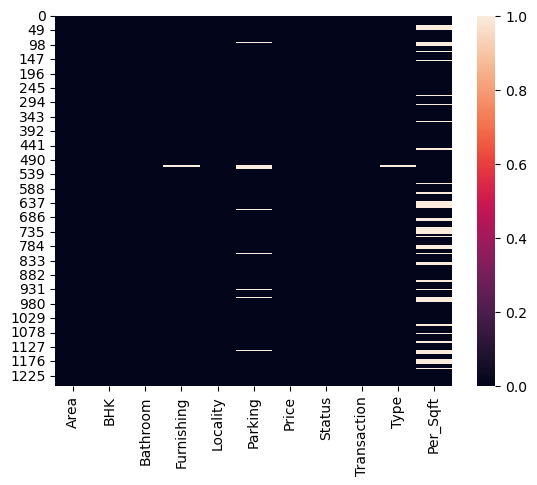

In [55]:
sns.heatmap(data.isnull())

In [56]:
data.drop("Per_Sqft", axis = 1, inplace = True)

In [57]:
data.dropna(inplace = True)

In [58]:
data.duplicated().sum()

103

In [59]:
data.drop_duplicates(inplace = True)

In [60]:
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor


In [61]:
data_null = data.isna().mean() * 100
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
Area,0.0
BHK,0.0
Bathroom,0.0
Furnishing,0.0
Locality,0.0
Parking,0.0
Price,0.0
Status,0.0
Transaction,0.0
Type,0.0


<AxesSubplot:>

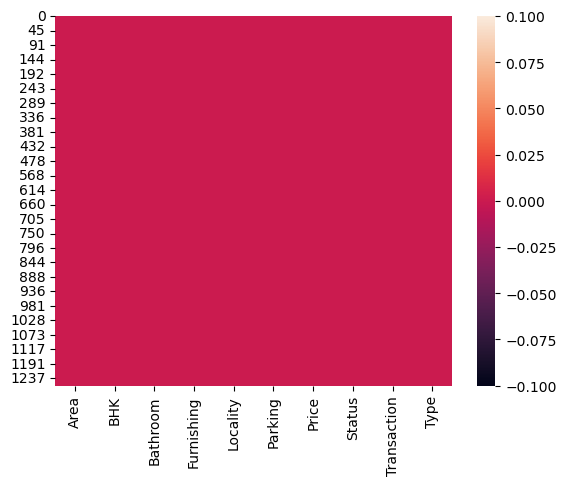

In [62]:
sns.heatmap(data.isnull())

# EDA

In [63]:
data[['Parking','Bathroom']]=data[['Parking','Bathroom']].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1122 entries, 0 to 1258

Data columns (total 10 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   Area         1122 non-null   float64

 1   BHK          1122 non-null   int64  

 2   Bathroom     1122 non-null   int64  

 3   Furnishing   1122 non-null   object 

 4   Locality     1122 non-null   object 

 5   Parking      1122 non-null   int64  

 6   Price        1122 non-null   int64  

 7   Status       1122 non-null   object 

 8   Transaction  1122 non-null   object 

 9   Type         1122 non-null   object 

dtypes: float64(1), int64(4), object(5)

memory usage: 96.4+ KB


In [64]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type
0,800.0,3,2,Semi-Furnished,Rohini Sector 25,1,6500000,Ready_to_move,New_Property,Builder_Floor
1,750.0,2,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1,5000000,Ready_to_move,New_Property,Apartment
2,950.0,2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1,15500000,Ready_to_move,Resale,Apartment
3,600.0,2,2,Semi-Furnished,Rohini Sector 24,1,4200000,Ready_to_move,Resale,Builder_Floor
4,650.0,2,2,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1,6200000,Ready_to_move,New_Property,Builder_Floor


In [65]:
round(data.describe(), 2)

,Area,BHK,Bathroom,Parking,Price
count,1122.00,1122.00,1122.00,1122.00,1.122000e+03
mean,1448.37,2.79,2.56,2.00,2.101744e+07
std,1503.08,0.96,1.05,6.56,2.475097e+07
min,28.00,1.00,1.00,1.00,1.000000e+06
25%,800.00,2.00,2.00,1.00,5.612500e+06
50%,1152.50,3.00,2.00,1.00,1.400000e+07
75%,1700.00,3.00,3.00,2.00,2.580000e+07
max,24300.00,10.00,7.00,114.00,2.400000e+08


In [66]:
round(data.corr(), 3)

,Area,BHK,Bathroom,Parking,Price
Area,1.000,0.462,0.551,-0.011,0.592
BHK,0.462,1.000,0.779,-0.072,0.579
Bathroom,0.551,0.779,1.000,-0.035,0.740
Parking,-0.011,-0.072,-0.035,1.000,-0.001
Price,0.592,0.579,0.740,-0.001,1.000


<AxesSubplot:>

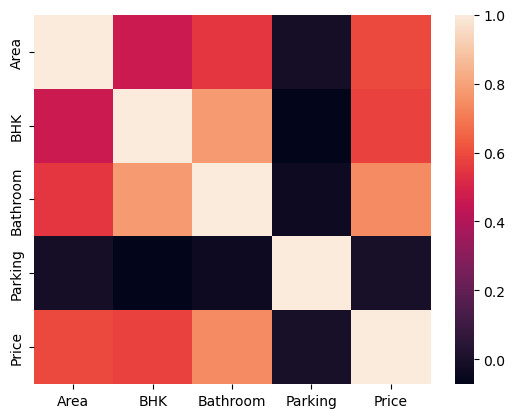

In [67]:
sns.heatmap(data.corr())

> ___new columns___

In [68]:
data['Price per square meter'] = round(data['Price'] / data['Area'])

In [69]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Price per square meter
0,800.0,3,2,Semi-Furnished,Rohini Sector 25,1,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0
1,750.0,2,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2,Furnished,"Citizen Apartment, Rohini Sector 13",1,15500000,Ready_to_move,Resale,Apartment,16316.0
3,600.0,2,2,Semi-Furnished,Rohini Sector 24,1,4200000,Ready_to_move,Resale,Builder_Floor,7000.0
4,650.0,2,2,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1,6200000,Ready_to_move,New_Property,Builder_Floor,9538.0


In [70]:
round(data.corr(), 3)

,Area,BHK,Bathroom,Parking,Price,Price per square meter
Area,1.000,0.462,0.551,-0.011,0.592,0.019
BHK,0.462,1.000,0.779,-0.072,0.579,0.211
Bathroom,0.551,0.779,1.000,-0.035,0.740,0.265
Parking,-0.011,-0.072,-0.035,1.000,-0.001,0.002
Price,0.592,0.579,0.740,-0.001,1.000,0.338
Price per square meter,0.019,0.211,0.265,0.002,0.338,1.000


<AxesSubplot:>

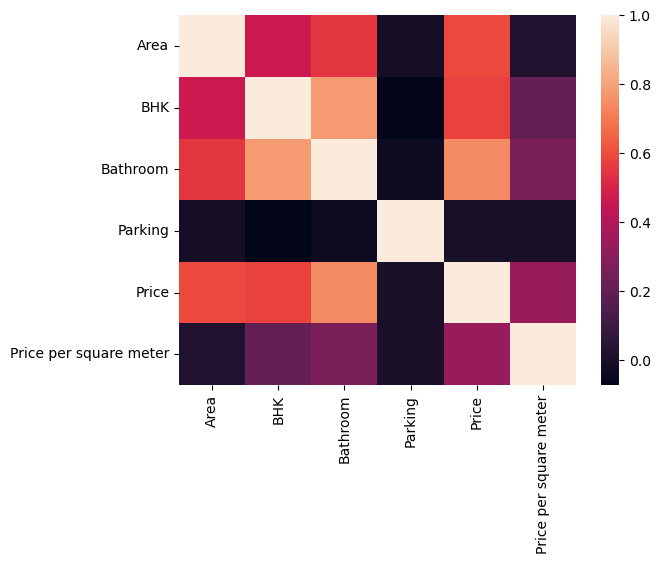

In [71]:
sns.heatmap(data.corr())

In [72]:
data.nunique()

Area                      312
BHK                         8
Bathroom                    7
Furnishing                  3
Locality                  353
Parking                     9
Price                     279
Status                      2
Transaction                 2
Type                        2
Price per square meter    780
dtype: int64

In [73]:
data.Furnishing.value_counts()

Semi-Furnished    640
Unfurnished       314
Furnished         168
Name: Furnishing, dtype: int64

In [74]:
data.Status.value_counts()

Ready_to_move    1066
Almost_ready       56
Name: Status, dtype: int64

In [75]:
data.Transaction.value_counts()

Resale          707
New_Property    415
Name: Transaction, dtype: int64

In [76]:
data.Type.value_counts()

Builder_Floor    617
Apartment        505
Name: Type, dtype: int64

In [77]:
data.Locality.value_counts()[0]

29

In [78]:
data.Bathroom.value_counts()

2    488
3    313
1    134
4    124
5     55
6      5
7      3
Name: Bathroom, dtype: int64

In [79]:
data.BHK.value_counts()

3     480
2     327
4     197
1      90
5      20
6       6
7       1
10      1
Name: BHK, dtype: int64

In [80]:
data.Parking.value_counts()

1      718
2      317
3       54
4       14
5        7
39       7
114      3
9        1
10       1
Name: Parking, dtype: int64

In [81]:
data.groupby(['Furnishing', 'Bathroom']).agg({
    'Price' : 'mean'
})

Price
Furnishing     Bathroom              
Furnished      1         4.547500e+06
               2         1.243570e+07
               3         2.164318e+07
               4         3.700000e+07
               5         4.200000e+07
               6         2.890000e+07
               7         1.600000e+08
Semi-Furnished 1         3.477273e+06
               2         9.635956e+06
               3         2.379312e+07
               4         4.852561e+07
               5         7.608421e+07
               6         8.433333e+07
               7         1.600000e+08
Unfurnished    1         2.828644e+06
               2         9.788000e+06
               3         2.182000e+07
               4         5.593300e+07
               5         7.453077e+07
               6         1.700000e+08
               7         7.370000e+07

<IPython.core.display.Javascript object>


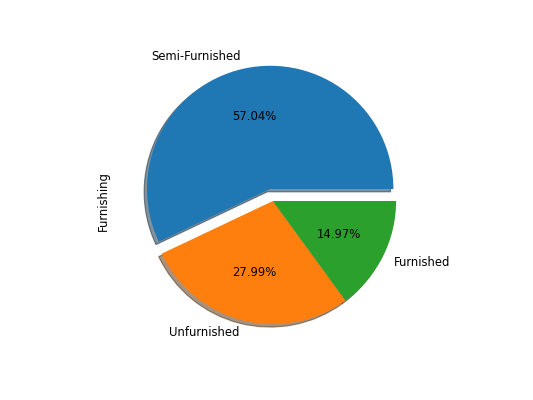

In [87]:
%matplotlib notebook
data.Furnishing.value_counts().plot(kind = 'pie', autopct="%0.2f%%", shadow=True, explode=[0.1,0,0])
plt.show()

<IPython.core.display.Javascript object>


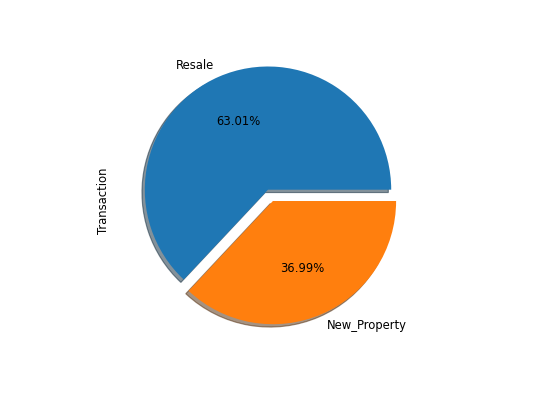

In [89]:
%matplotlib notebook
data.Transaction.value_counts().plot(kind = 'pie', autopct="%0.2f%%", shadow=True, explode=[0.1,0])
plt.show()

<IPython.core.display.Javascript object>


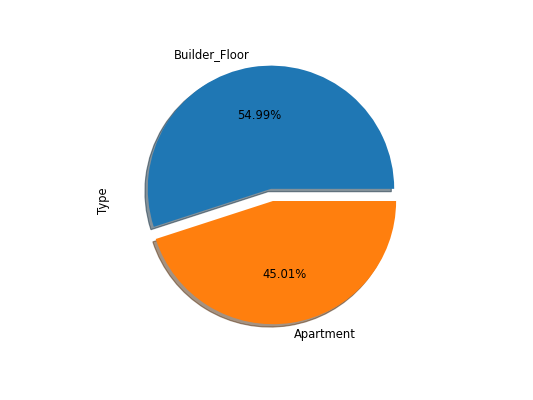

In [90]:
%matplotlib notebook
data.Type.value_counts().plot(kind = 'pie', autopct="%0.2f%%", shadow=True, explode=[0.1,0])
plt.show()

<IPython.core.display.Javascript object>


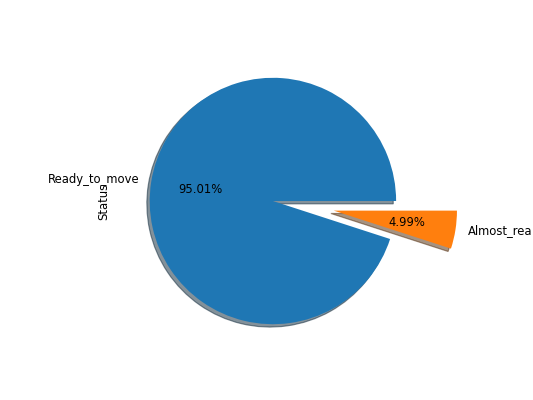

In [93]:
%matplotlib notebook
data.Status.value_counts().plot(kind = 'pie', autopct="%0.2f%%", shadow=True, explode=[0,0.5])
plt.show()

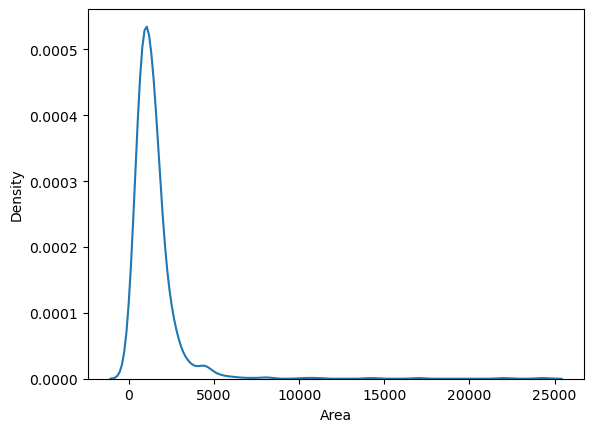

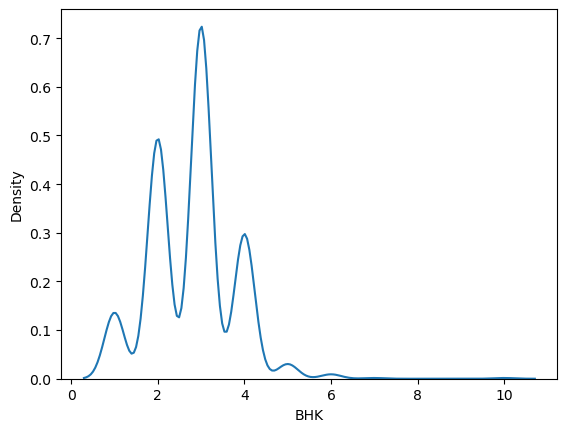

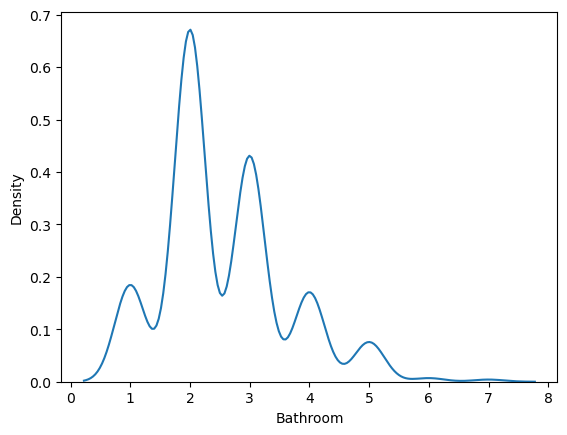

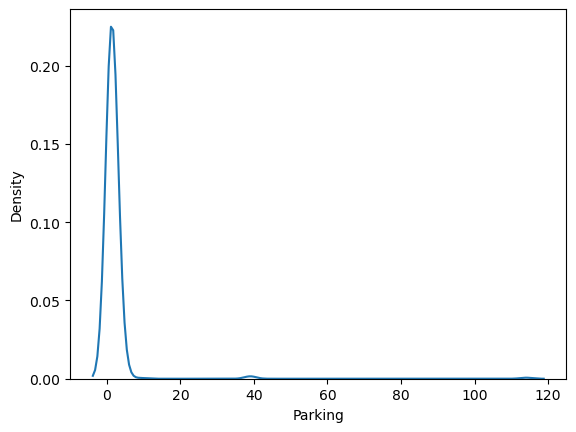

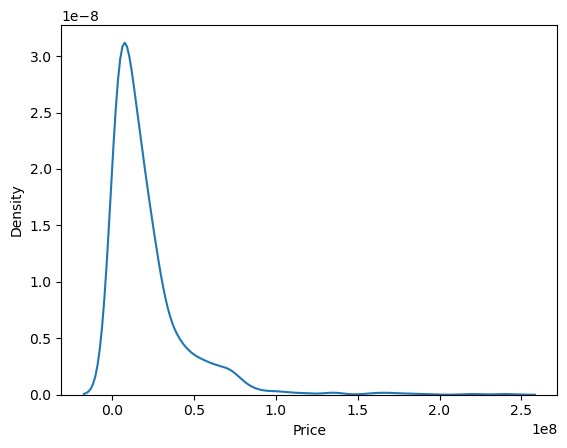

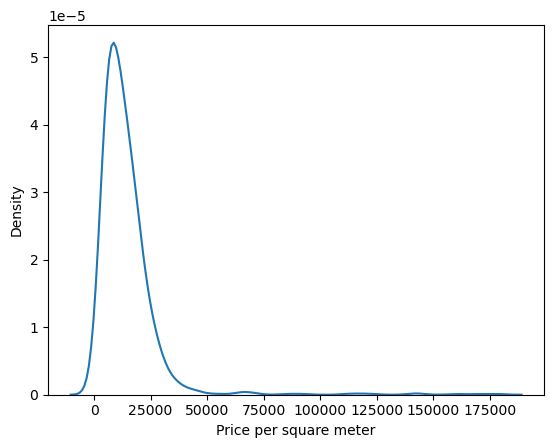

In [97]:
for index, i in enumerate(data.columns):
    if(data[i].dtype == np.float64 or data[i].dtype == np.int64):
        plt.figure(index)
        sns.kdeplot(data[i])
plt.show()

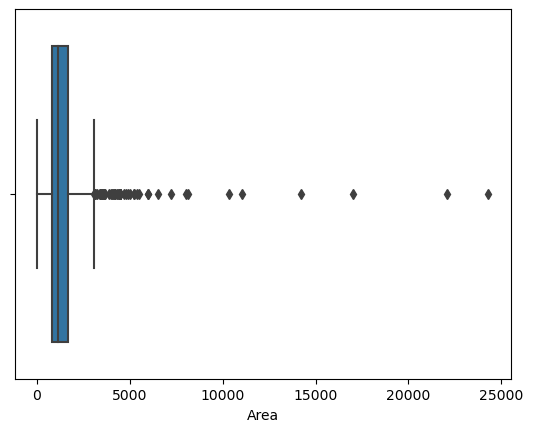

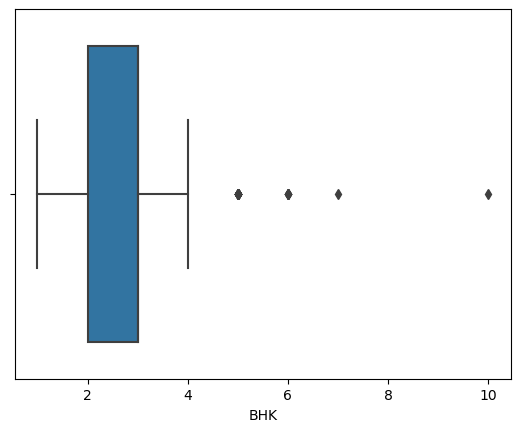

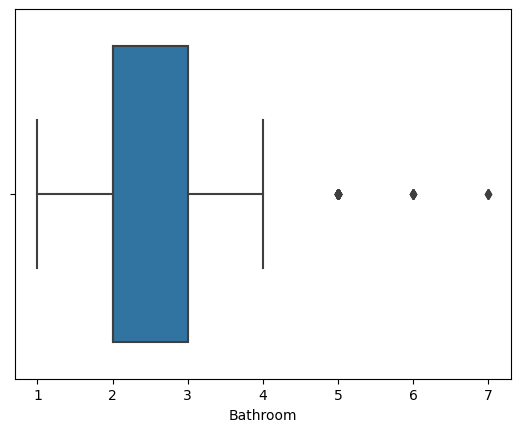

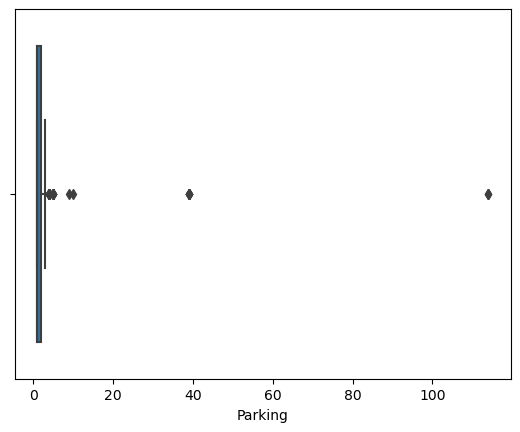

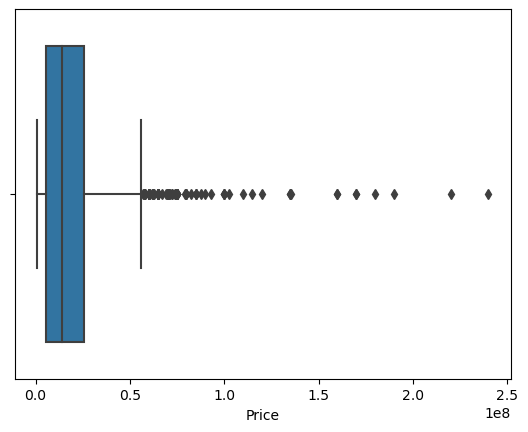

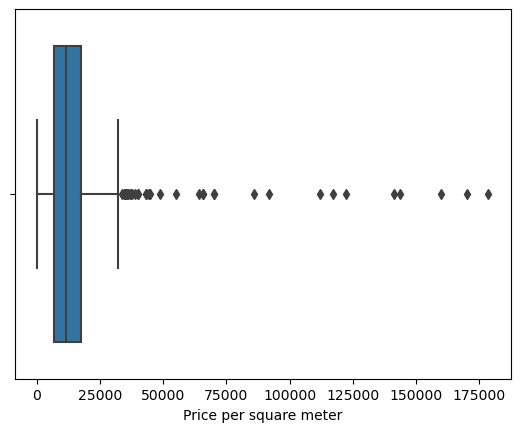

In [103]:
for index, i in enumerate(data.columns):
    if(data[i].dtype == np.float64 or data[i].dtype == np.int64):
        plt.figure(index)
        sns.boxplot(data[i])
plt.show()